In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize

plt.style.use ('ggplot')
import nltk

In [236]:
df = pd.read_csv('C:/Users/DELL/Downloads/BBC news/bbc_news.csv')

In [237]:
df.head()

,title,pubDate,guid,link,description
0,Ukraine: Angry Zelensky vows to punish Russian...,"Mon, 07 Mar 2022 08:01:56 GMT",https://www.bbc.co.uk/news/world-europe-60638042,https://www.bbc.co.uk/news/world-europe-606380...,The Ukrainian president says the country will ...
1,War in Ukraine: Taking cover in a town under a...,"Sun, 06 Mar 2022 22:49:58 GMT",https://www.bbc.co.uk/news/world-europe-60641873,https://www.bbc.co.uk/news/world-europe-606418...,"Jeremy Bowen was on the frontline in Irpin, as..."
2,Ukraine war 'catastrophic for global food',"Mon, 07 Mar 2022 00:14:42 GMT",https://www.bbc.co.uk/news/business-60623941,https://www.bbc.co.uk/news/business-60623941?a...,One of the world's biggest fertiliser firms sa...
3,Manchester Arena bombing: Saffie Roussos's par...,"Mon, 07 Mar 2022 00:05:40 GMT",https://www.bbc.co.uk/news/uk-60579079,https://www.bbc.co.uk/news/uk-60579079?at_medi...,The parents of the Manchester Arena bombing's ...
4,Ukraine conflict: Oil price soars to highest l...,"Mon, 07 Mar 2022 08:15:53 GMT",https://www.bbc.co.uk/news/business-60642786,https://www.bbc.co.uk/news/business-60642786?a...,Consumers are feeling the impact of higher ene...


In [238]:
print(df.shape)

(35860, 5)


In [239]:
import nltk
nltk.download('punkt', force=True)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [240]:
df.columns

Index(['title', 'pubDate', 'guid', 'link', 'description'], dtype='object')

In [241]:
df.dtypes

title          object
pubDate        object
guid           object
link           object
description    object
dtype: object

In [242]:
df.describe()

,title,pubDate,guid,link,description
count,35860,35860,35860,35860,35860
unique,33889,34470,33081,32335,33124
top,Election poll tracker: How do the parties comp...,"Tue, 13 Jun 2023 10:25:22 GMT",https://www.bbc.co.uk/news/business-61634959,https://www.bbc.co.uk/news/business-61634959?a...,How closely have you been paying attention to ...
freq,34,9,63,61,80


In [243]:
df.isna().sum()

title          0
pubDate        0
guid           0
link           0
description    0
dtype: int64

In [244]:
df.loc[df.duplicated()]

,title,pubDate,guid,link,description


In [245]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [246]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [247]:
print(df.columns.tolist())

['title', 'pubDate', 'guid', 'link', 'description']


In [248]:
sid = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['title_sentiment'] = df['title'].apply(get_sentiment)
df['description_sentiment'] = df['description'].apply(get_sentiment)

# Combine sentiments to determine overall sentiment
df['overall_sentiment'] = df[['title_sentiment', 'description_sentiment']].mode(axis=1)[0]

print(df.head())

df.to_csv('C:/Users/DELL/Downloads/BBC News Analysis.csv', index=False)

                                               title  \
0  Ukraine: Angry Zelensky vows to punish Russian...   
1  War in Ukraine: Taking cover in a town under a...   
2         Ukraine war 'catastrophic for global food'   
3  Manchester Arena bombing: Saffie Roussos's par...   
4  Ukraine conflict: Oil price soars to highest l...   

                         pubDate  \
0  Mon, 07 Mar 2022 08:01:56 GMT   
1  Sun, 06 Mar 2022 22:49:58 GMT   
2  Mon, 07 Mar 2022 00:14:42 GMT   
3  Mon, 07 Mar 2022 00:05:40 GMT   
4  Mon, 07 Mar 2022 08:15:53 GMT   

                                               guid  \
0  https://www.bbc.co.uk/news/world-europe-60638042   
1  https://www.bbc.co.uk/news/world-europe-60641873   
2      https://www.bbc.co.uk/news/business-60623941   
3            https://www.bbc.co.uk/news/uk-60579079   
4      https://www.bbc.co.uk/news/business-60642786   

                                                link  \
0  https://www.bbc.co.uk/news/world-europe-606380...   
1  

In [ ]:
sid = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the 'title' and 'description' columns
df['title_sentiment'] = df['title'].apply(get_sentiment)
df['description_sentiment'] = df['description'].apply(get_sentiment)

# You might want to combine these sentiments or analyze them separately
# Example: Overall sentiment based on title and description
df['overall_sentiment'] = df[['title_sentiment', 'description_sentiment']].mode(axis=1)[0]

# Print the sentiment counts
print(df['overall_sentiment'].value_counts())

In [ ]:
sentiment_counts = df['overall_sentiment'].value_counts()
# Pie Chart
plt.figure(figsize=(6, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Distribution of Sentiment')
plt.show()

In [195]:
columns_to_drop = ['title_y', 'pubDate_y', 'link_y', 'description_y']
combined_df = combined_df.drop(columns=columns_to_drop, errors='ignore')

combined_df.to_csv('C:/Users/DELL/Downloads/BBC_News_Combined_Cleaned.csv', index=False)
print(combined_df.head())

                                                               title_x  \
pubDate_x                                                                
2023-02-21 00:33:20  Grammar schools still failing to boost number ...   
2022-09-19 23:39:34  Ukraine war: A village celebrates Russian retreat   
2022-10-24 23:32:43  Russia accused of sabotaging Ukraine water pip...   
2023-03-03 14:12:09  Always-available veg recipes you can rely on t...   
2023-04-04 12:38:23                    How to crack Easter on a budget   

                                                                  guid  \
pubDate_x                                                                
2023-02-21 00:33:20  https://www.bbc.co.uk/digihub/family-and-educa...   
2022-09-19 23:39:34    https://www.bbc.co.uk/digihub/politics-62930568   
2022-10-24 23:32:43    https://www.bbc.co.uk/digihub/politics-63092858   
2023-03-03 14:12:09  https://www.bbc.co.uk/food/articles/always_ava...   
2023-04-04 12:38:23  https://www.bbc.

In [196]:
combined_df.head()

,title_x,guid,link_x,description_x,title_sentiment,description_sentiment,overall_sentiment
pubDate_x,,,,,,,
2023-02-21 00:33:20,Grammar schools still failing to boost number ...,https://www.bbc.co.uk/digihub/family-and-educa...,https://www.bbc.co.uk/digihub/family-and-educa...,Most have tried to improve their admissions po...,negative,positive,negative
2022-09-19 23:39:34,Ukraine war: A village celebrates Russian retreat,https://www.bbc.co.uk/digihub/politics-62930568,https://www.bbc.co.uk/digihub/politics-6293056...,"Russia's Ukraine retreat leaves joy, but also ...",positive,negative,negative
2022-10-24 23:32:43,Russia accused of sabotaging Ukraine water pip...,https://www.bbc.co.uk/digihub/politics-63092858,https://www.bbc.co.uk/digihub/politics-6309285...,A BBC investigation finds evidence that Russia...,negative,negative,negative
2023-03-03 14:12:09,Always-available veg recipes you can rely on t...,https://www.bbc.co.uk/food/articles/always_ava...,https://www.bbc.co.uk/food/articles/always_ava...,If the limited veg availability has left your ...,negative,negative,negative
2023-04-04 12:38:23,How to crack Easter on a budget,https://www.bbc.co.uk/food/articles/budget_easter,https://www.bbc.co.uk/food/articles/budget_eas...,BBC Food's money saving tips for making Easter...,neutral,positive,neutral


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['title'].fillna(''))

word_freq = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

word_freq_df = pd.DataFrame({'word': words, 'frequency': word_freq})
top_words = word_freq_df.sort_values(by='frequency', ascending=False).head(20) 

heatmap_data = top_words[['frequency']].T

plt.figure(figsize=(10, 4))
ax = sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d', cbar=False, 
                 yticklabels=False, xticklabels=top_words['word'])
plt.title('Top 20 Most Frequent Words in Titles')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


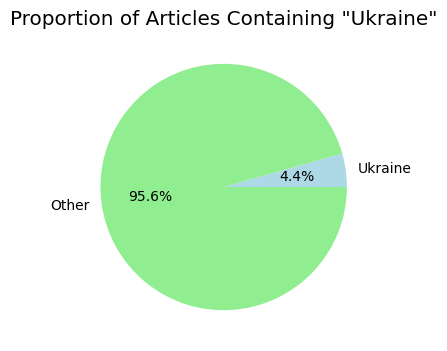

In [226]:
ukraine_articles = df['title'].str.contains('Ukraine', case=False).sum()
other_articles = len(df) - ukraine_articles

plt.figure(figsize=(4, 4))
plt.pie([ukraine_articles, other_articles], labels=['Ukraine', 'Other'], autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Proportion of Articles Containing "Ukraine"')
plt.show()


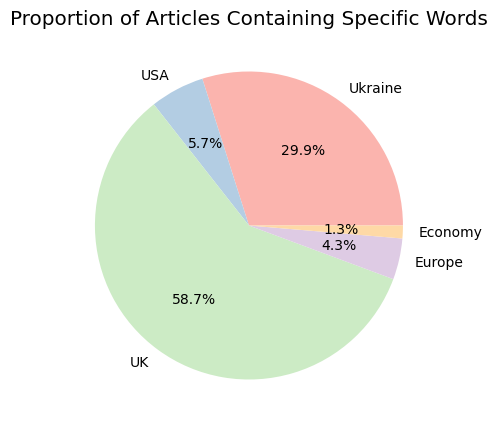

In [228]:
import pandas as pd
import matplotlib.pyplot as plt

# List of words to check
words_to_check = ['Ukraine', 'USA', 'UK', 'Europe', 'Economy']

# Count occurrences of each word in the 'title' column
def count_word_occurrences(df, words):
    counts = {word: df['title'].str.contains(word, case=False, na=False).sum() for word in words}
    return counts


word_counts = count_word_occurrences(df, words_to_check)

word_counts_df = pd.DataFrame(list(word_counts.items()), columns=['Word', 'Count'])

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(word_counts_df['Count'], labels=word_counts_df['Word'], autopct='%1.1f%%', colors=plt.get_cmap('Pastel1').colors)
plt.title('Proportion of Articles Containing Specific Words')
plt.show()
